# Exercice : Langage des signes

## Création du learning et validation dataset

In [15]:
import pandas as pd
from utils.data_processing import load_dataframe_from_file, store_data

def flatten_row(row):
    input_flat = row['inputs'].flatten().tolist()
    label_flat = row['label'].tolist()
    return input_flat + label_flat

# DataFrame de base
df = load_dataframe_from_file('../datasets/LangageDesSignes/data_formatted.csv', 5, add_x0=False)

# Creation du learning dataset
df['class'] = df['label'].apply(lambda x: int(np.argmax(x)))

df_learning = (
    df.groupby('class')
      .apply(lambda x: x.sample(n=50, random_state=42))
      .reset_index(drop=True)
)

df_learning = df_learning.drop(columns=['class'])
# print(df_learning)

df_learning_good = pd.DataFrame(df_learning.apply(flatten_row, axis=1).tolist())
df_learning_good.to_csv('../datasets/LangageDesSignes/learning_dataset.csv', index=False, sep=",", header=False)


# Creation du validation dataset
df['class'] = df['label'].apply(lambda x: int(np.argmax(x)))

selected_indices = df.groupby('class').apply(lambda x: x.sample(n=50, random_state=42)).index.get_level_values(1)
df_remaining = df.drop(index=selected_indices)

df_validation = df_remaining[['inputs', 'label']].reset_index(drop=True)

df_validation_good = pd.DataFrame(
    df_validation.apply(lambda row: row['inputs'].flatten().tolist() + row['label'].tolist(), axis=1).tolist()
)

df_validation_good.to_csv('../datasets/LangageDesSignes/validation_dataset.csv', index=False, sep=",", header=False)
store_data(df_validation_good, '../datasets/LangageDesSignes/validation_dataset_lionel.csv')

test_learn = load_dataframe_from_file("../datasets/LangageDesSignes/learning_dataset.csv",5)
test_valid = load_dataframe_from_file("../datasets/LangageDesSignes/validation_dataset.csv",5)
print(test_learn)
print(test_valid)

                                                inputs            label
0    [1.0, 0.0, 0.0, -0.3317073170731707, 0.1760563...  [1, 0, 0, 0, 0]
1    [1.0, 0.0, 0.0, -0.3385416666666667, 0.1824324...  [1, 0, 0, 0, 0]
2    [1.0, 0.0, 0.0, -0.2844036697247706, 0.1030927...  [1, 0, 0, 0, 0]
3    [1.0, 0.0, 0.0, -0.3186119873817035, 0.1516393...  [1, 0, 0, 0, 0]
4    [1.0, 0.0, 0.0, -0.3203463203463203, 0.1490683...  [1, 0, 0, 0, 0]
..                                                 ...              ...
245  [1.0, 0.0, 0.0, -0.4313725490196078, -0.005714...  [0, 0, 0, 0, 1]
246  [1.0, 0.0, 0.0, -0.4423076923076923, -0.015706...  [0, 0, 0, 0, 1]
247  [1.0, 0.0, 0.0, -0.4, -0.0264150943396226, -0....  [0, 0, 0, 0, 1]
248  [1.0, 0.0, 0.0, -0.5636363636363636, 0.0923076...  [0, 0, 0, 0, 1]
249  [1.0, 0.0, 0.0, -0.3854166666666667, -0.078571...  [0, 0, 0, 0, 1]

[250 rows x 2 columns]
                                               inputs            label
0   [1.0, 0.0, 0.0, -0.296, 0.12037037037

C:\Users\Axel\AppData\Local\Temp\ipykernel_19712\2693095144.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=50, random_state=42))
C:\Users\Axel\AppData\Local\Temp\ipykernel_19712\2693095144.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected_indices = df.groupby('class').apply(lambda x: x.sample(n=50, random_state=42)).index.get_level_values(1)


## Apprentissage du réseau

Ici nous avons mis 5 neurones sur la couche de sortie car il y a 5 classes différentes

In [1]:
import numpy as np
from multilayer.layer import Layer
from multilayer.model import Model
from utils.data_processing import load_dataframe_from_file

model = Model([
    Layer(units=10, activation="sigmoid", input_size=42),
    Layer(units=5, activation="sigmoid"),
])

training_df = load_dataframe_from_file("../datasets/LangageDesSignes/learning_dataset.csv", 5)
x_train = np.array([x[1:] for x in training_df["inputs"]], dtype=float)
y_train = np.stack(training_df["label"].values)

 # Je vous épargne l'output, on se limite au cinq premiers.
print(f"x_train =\n {x_train[0:5]}")
print(f"y_train =\n {y_train[0:5]}")

history = model.fit(x_train, y_train, 0.5, 0.001, 2000)

for case, y_true in zip(x_train[0:5], y_train[0:5]):
    answer = model.forward(case)
    print(f"answer_predicted: {answer.round()} | answer_real: {y_true}")


x_train =
 [[ 0.          0.         -0.33170732  0.17605634 -0.58536585  0.4084507
  -0.80487805  0.50704225 -1.          0.47887324 -0.38536585  0.95070423
  -0.59512195  0.94366197 -0.50731707  0.64788732 -0.4195122   0.66901408
  -0.2097561   1.         -0.43414634  0.88732394 -0.36585366  0.57042254
  -0.28780488  0.66197183 -0.04878049  0.95070423 -0.24390244  0.88732394
  -0.21463415  0.58450704 -0.13170732  0.66197183  0.09268293  0.85915493
  -0.04390244  0.83802817 -0.08292683  0.62676056 -0.0097561   0.64788732]
 [ 0.          0.         -0.33854167  0.18243243 -0.58854167  0.4527027
  -0.79166667  0.56081081 -1.          0.55405405 -0.375       0.9527027
  -0.61979167  0.95945946 -0.5625      0.66216216 -0.46875     0.64189189
  -0.203125    1.         -0.46875     0.88513514 -0.41145833  0.54054054
  -0.30729167  0.58783784 -0.03125     0.93918919 -0.28125     0.84459459
  -0.25520833  0.52702703 -0.14583333  0.57432432  0.11458333  0.82432432
  -0.07291667  0.81756757 -0.

## Graphique d'apprentissage du réseau de neurone

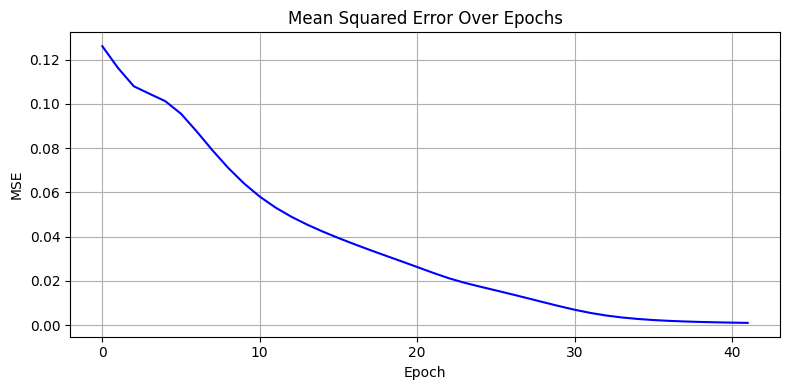

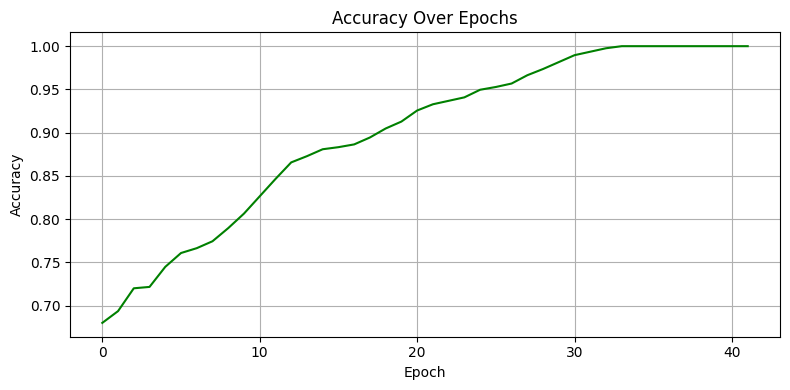

In [8]:
import matplotlib.pyplot as plt

graph = history.df

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

## Graphique des répartissions des classes

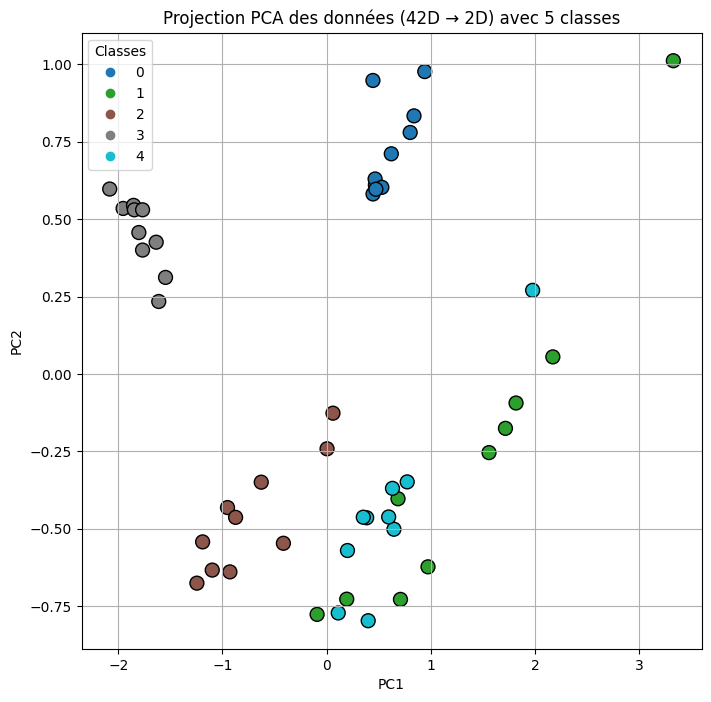

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# X = données d'entrée (42 colonnes), y = labels one-hot
X = x_train
y = np.argmax(y_train, axis=1)  # on convertit le one-hot en classes (0 à 4)

# Réduction de dimension avec PCA (2 composantes principales)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

# Affichage en 2D
plt.figure(figsize=(8, 8))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='tab10', s=100, edgecolors='k')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA des données (42D → 2D) avec 5 classes")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


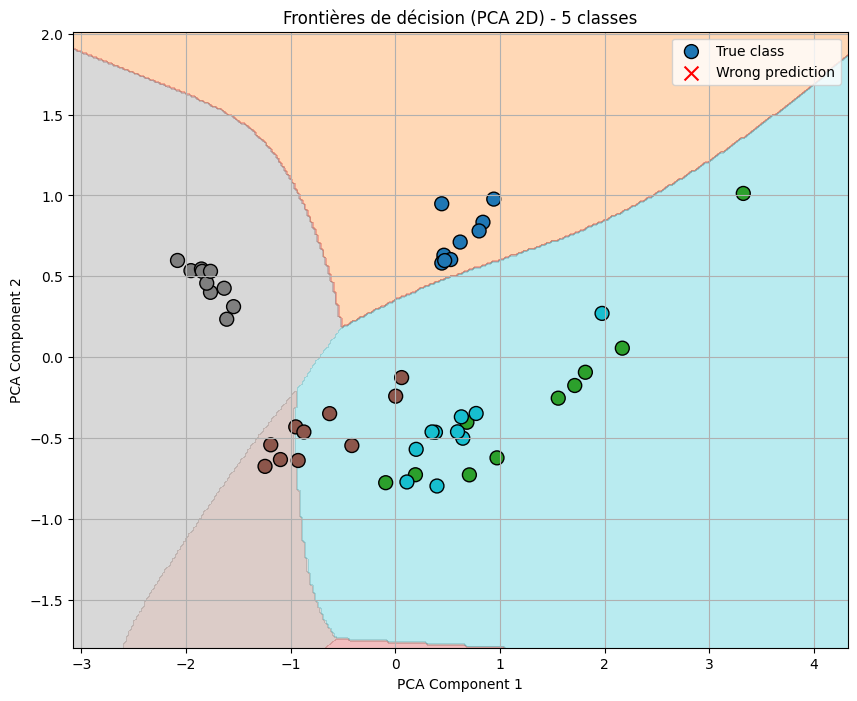

In [10]:
y_classes = np.argmax(y_train, axis=1)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

# Créer une grille 2D dans l'espace PCA
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_2d = np.c_[xx.ravel(), yy.ravel()]

# Revenir à l’espace original (42D) via l’inverse de PCA
grid_original = pca.inverse_transform(grid_2d)

# Prédire avec le modèle
Z = np.array([np.argmax(model.forward(x)) for x in grid_original])
Z = Z.reshape(xx.shape)

# Afficher les frontières
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10', levels=np.arange(6) - 0.5)

# Afficher les données projetées
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_classes, cmap='tab10', s=100, edgecolors='k', label="True class")

# Ajouter les erreurs en croix rouge
y_pred = np.array([np.argmax(model.forward(x)) for x in x_train])
incorrect = y_classes != y_pred
plt.scatter(x_pca[incorrect, 0], x_pca[incorrect, 1], marker='x', color='red', s=100, label="Wrong prediction")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Frontières de décision (PCA 2D) - 5 classes")
plt.legend()
plt.grid(True)
plt.show()

## Test du réseau avec le Validation DataSet

In [7]:
validation_df = load_dataframe_from_file("../datasets/LangageDesSignes/validation_dataset.csv", 5)
x_train = np.array([x[1:] for x in validation_df["inputs"]], dtype=float)
y_train = np.stack(validation_df["label"].values)

 # Je vous épargne l'output, on se limite au cinq premiers.
print(f"x_train =\n {x_train[0:5]}")
print(f"y_train =\n {y_train[0:5]}")

compteur_erreur = 0
for case, y_true in zip(x_train, y_train):
    answer = model.forward(case)
    print(f"answer_predicted: {answer.round()} | answer_real: {y_true}")
    if answer.round().all() != y_true.all():
        compteur_erreur += 1

print(f"Compteur erreur : {compteur_erreur}")

x_train =
 [[ 0.          0.         -0.296       0.12037037 -0.552       0.37037037
  -0.792       0.55555556 -1.          0.57407407 -0.4         0.76851852
  -0.448       1.         -0.408       0.71296296 -0.384       0.62962963
  -0.208       0.78703704 -0.256       0.96296296 -0.248       0.62962963
  -0.248       0.61111111 -0.016       0.76851852 -0.064       0.92592593
  -0.088       0.62962963 -0.096       0.59259259  0.16        0.72222222
   0.128       0.87962963  0.072       0.68518519  0.072       0.61111111]
 [ 0.          0.         -0.28240741  0.11728395 -0.56018519  0.37654321
  -0.79166667  0.54320988 -1.          0.54938272 -0.41203704  0.86419753
  -0.50925926  1.         -0.44907407  0.69135802 -0.40277778  0.69135802
  -0.20833333  0.88271605 -0.30092593  0.98148148 -0.28703704  0.59876543
  -0.25925926  0.66049383 -0.01388889  0.85185185 -0.10185185  0.94444444
  -0.11574074  0.61111111 -0.09722222  0.66049383  0.16203704  0.80246914
   0.10648148  0.88888889 